# Import The Library Of Panda Numpy Seaborn

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 15)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Loading The Pandas , Numpy And Seaborn")

Loading The Pandas , Numpy And Seaborn


## Load The Data File Of The Lending Club (LendingClubLoans2018-2020.csv)

In [2]:
pd.options.display.max_rows = 120

# Defining The Dataset File Path 
Lending_Data_Path = "C:/Users/Patrick-Pc/Documents/Python_Workspace/Data_Mining_CW2/LendingClubLoans2018-2020.csv"

#Loading The Data Using The Panda Lib.
Lending_Data = pd.read_csv(Lending_Data_Path)


# Summary Of The Data

## Print The First 5 Rows Using The Head Function.

In [3]:
#Show the first and last few records to check data is loading correctly
Lending_Data.head()

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
0,113924213,Stagehand,Individual,RENT,Fully Paid,35000,15.05%,36 months,1214.15,C,...,80.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,113101099,Detention Deputy,Individual,RENT,Charged Off,21000,14.08%,60 months,489.51,C,...,100.0,33.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,113672609,NaN,Individual,MORTGAGE,Current,20000,14.08%,60 months,466.20,C,...,100.0,18.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,115053799,Driver,Individual,RENT,Fully Paid,16000,19.03%,36 months,586.74,D,...,95.7,75.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,6317122,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,24000,8.90%,60 months,497.04,A,...,100.0,0.0,0,0,NaN,3.0,38.81,5283.25,42.29,116.43


## Print The Last 5 Rows Using The Tail Function.

In [4]:
Lending_Data.tail()

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
77154,119243234,IT analyst,Individual,MORTGAGE,Current,3500,15.05%,36 months,121.42,C,...,100.0,100.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77155,120037535,Principal IA Engineer,Individual,MORTGAGE,Current,2000,7.97%,36 months,62.65,A,...,100.0,66.7,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77156,125555899,Attorney,Individual,RENT,Fully Paid,7000,5.32%,36 months,210.81,A,...,100.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77157,117270963,Pastor,Individual,OWN,Fully Paid,12800,20.00%,36 months,475.70,D,...,94.4,100.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77158,117596312,strander,Individual,MORTGAGE,Fully Paid,2400,9.93%,36 months,77.37,B,...,100.0,100.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Lets Check The Total Rows And Columns In The Data Set

In [5]:
Lending_Data.shape

(77159, 108)

## Lets Check The Summary Stats of The Data Using The Describe Function.

In [6]:
# Using The Below Command Only Show The Data Related To Numeric Column
Lending_Data.describe()

,id,loan_amnt,installment,annual_inc,annual_inc_joint,dti,dti_joint,delinq_2yrs,inq_fi,inq_last_12m,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
count,7.715900e+04,77159.000000,77159.000000,7.715900e+04,9.382000e+03,77051.000000,9382.000000,77159.000000,74664.000000,74664.000000,...,77154.000000,76040.000000,77159.000000,77159.000000,9382.000000,4491.000000,6117.000000,6117.000000,6117.000000,5989.000000
mean,1.152632e+08,15156.519978,443.024291,7.836316e+04,1.200300e+05,19.690700,19.616616,0.321012,0.967709,1.943641,...,93.762679,38.434283,0.127866,0.038829,32400.147197,2.272545,157.217314,6925.184353,694.179147,223.813354
std,2.033129e+07,9749.195616,279.917146,8.492549e+04,6.042086e+04,21.589715,7.643524,0.932101,1.431024,2.257943,...,9.761986,36.271699,0.346214,0.352836,26588.310055,0.583821,277.110950,7026.968193,1568.831655,332.369244
min,1.227221e+06,1000.000000,7.610000,0.000000e+00,1.580100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.900000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.010000,0.000000
25%,1.141658e+08,7800.000000,239.520000,4.500000e+04,8.300000e+04,11.960000,14.030000,0.000000,0.000000,0.000000,...,90.900000,0.000000,0.000000,0.000000,14580.750000,2.000000,0.000000,1325.240000,242.930000,27.400000
50%,1.178768e+08,12175.000000,368.900000,6.500000e+04,1.091670e+05,18.080000,19.300000,0.000000,0.000000,1.000000,...,100.000000,33.300000,0.000000,0.000000,25756.000000,2.000000,0.000000,4178.300000,400.000000,97.771770
75%,1.248023e+08,20000.000000,591.285000,9.400000e+04,1.430000e+05,25.010000,24.917500,0.000000,1.000000,3.000000,...,100.000000,66.700000,0.000000,0.000000,42373.000000,2.000000,243.290000,10983.820000,670.230000,304.688880
max,1.264174e+08,40000.000000,1717.630000,1.099920e+07,1.058000e+06,999.000000,39.970000,36.000000,21.000000,35.000000,...,100.000000,100.000000,6.000000,44.000000,357135.000000,4.000000,1793.180000,40306.410000,25970.000000,5321.560000


In [7]:
# Only Show The Char Type Of Data Summary But we can use Include=all parameter to get the combine result of the numeric and categorical
Lending_Data.describe(include="object")

,emp_title,application_type,home_ownership,loan_status,int_rate,term,grade,earliest_cr_line,issue_d,last_pymnt_d,...,verification_status_joint,pymnt_plan,purpose,hardship_flag,hardship_reason,hardship_type,hardship_status,payment_plan_start_date,initial_list_status,revol_util
count,71297,77159,77159,77159,77159,77159,77159,77159,77159,77159,...,9379,77159,77159,75532,4491,4491,4491,4491,77159,77056
unique,28185,2,5,7,129,2,7,622,16,28,...,3,1,13,2,17,6,4,36,2,1074
top,Teacher,Individual,MORTGAGE,Fully Paid,16.02%,36 months,C,Sep-05,01-08-2017,01-05-2020,...,Not Verified,n,debt_consolidation,N,INCOMECURT,CVD19SKIP,ACTIVE,Apr-20,w,0%
freq,1658,67777,37334,34289,5181,52800,25152,665,17934,32333,...,4064,77159,42980,71962,2614,3906,3570,2392,61477,509


## Lets Check The Data Type Of The All Column Using Dataset Info Fucntion.

In [8]:
Lending_Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 108 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   id                                          int64  
 1   emp_title                                   object 
 2   application_type                            object 
 3   home_ownership                              object 
 4   loan_status                                 object 
 5   loan_amnt                                   int64  
 6   int_rate                                    object 
 7   term                                        object 
 8   installment                                 float64
 9   grade                                       object 
 10  earliest_cr_line                            object 
 11  issue_d                                     object 
 12  last_pymnt_d                                object 
 13  next_pymnt_d                  

## Find Count And Name Of The Numeric Column Name From Dataset

In [9]:
print(f"Find The Count Of The Numeric Colmun {len(Lending_Data.select_dtypes(include=np.number).columns)} \n")

print(Lending_Data.select_dtypes(include='number').columns.tolist)

Find The Count Of The Numeric Colmun 86 

<bound method IndexOpsMixin.tolist of Index(['id', 'loan_amnt', 'installment', 'annual_inc', 'annual_inc_joint',
       'dti', 'dti_joint', 'delinq_2yrs', 'inq_fi', 'inq_last_12m',
       'inq_last_6mths', 'fico_range_low', 'fico_range_high',
       'last_fico_range_high', 'last_fico_range_low', 'mort_acc', 'open_acc',
       'open_acc_6m', 'acc_open_past_24mths', 'pub_rec', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'total_cu_tl',
       'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'total_rev_hi_lim',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'mths_since_last_record',
       'mths_since_last_major_derog', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_rcnt_il', 'mths_since_last_delinq',
       'mths_since_recent_revol_delin

## Find Count And Name Of The Cateogorical Column From Dataset.

In [10]:
print(f"Find The Count Of The Cateogorical Colmun {len(Lending_Data.select_dtypes(exclude=np.number).columns)} \n")

print(Lending_Data.select_dtypes(exclude=np.number).columns.tolist)

Find The Count Of The Cateogorical Colmun 22 

<bound method IndexOpsMixin.tolist of Index(['emp_title', 'application_type', 'home_ownership', 'loan_status',
       'int_rate', 'term', 'grade', 'earliest_cr_line', 'issue_d',
       'last_pymnt_d', 'next_pymnt_d', 'verification_status',
       'verification_status_joint', 'pymnt_plan', 'purpose', 'hardship_flag',
       'hardship_reason', 'hardship_type', 'hardship_status',
       'payment_plan_start_date', 'initial_list_status', 'revol_util'],
      dtype='object')>


## Lets Find The Missing Data Count In Each Column Using data frame isNull function and then sum all the values.

In [11]:
Lending_Data.isnull().sum().sort_values(ascending=False).head(15)

hardship_status                               72668
payment_plan_start_date                       72668
hardship_reason                               72668
hardship_type                                 72668
deferral_term                                 72668
orig_projected_additional_accrued_interest    71170
hardship_last_payment_amount                  71042
hardship_amount                               71042
hardship_payoff_balance_amount                71042
verification_status_joint                     67780
dti_joint                                     67777
revol_bal_joint                               67777
annual_inc_joint                              67777
mths_since_last_record                        65802
mths_since_recent_bc_dlq                      59765
dtype: int64

## Lets Calculate The Percentage Of The Missing Value Of Every Column And Sort In Descending Order

In [12]:
def find_missing_value(data_set):
    percent_missing = data_set.isnull().sum() * 100 / len(data_set)
    missing_value_df = pd.DataFrame({'column_name': data_set.columns,'percent_missing': percent_missing})
    missing_value_df=missing_value_df.sort_values('percent_missing', ascending=False)
    
    return missing_value_df

In [13]:
find_missing_value(Lending_Data).head(15)

,column_name,percent_missing
deferral_term,deferral_term,94.179551
payment_plan_start_date,payment_plan_start_date,94.179551
hardship_status,hardship_status,94.179551
hardship_type,hardship_type,94.179551
hardship_reason,hardship_reason,94.179551
orig_projected_additional_accrued_interest,orig_projected_additional_accrued_interest,92.238106
hardship_last_payment_amount,hardship_last_payment_amount,92.072215
hardship_payoff_balance_amount,hardship_payoff_balance_amount,92.072215
hardship_amount,hardship_amount,92.072215
verification_status_joint,verification_status_joint,87.844581


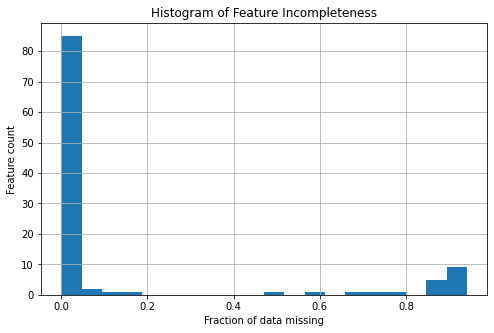

In [14]:
plt.figure(figsize=(8,5))
(Lending_Data.isna().sum() / Lending_Data.shape[0]).hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count');

### From The Above Histo-Gram We can see that So Many Columns have missing values above 10% and other are below 10%

## Calculate The Total Percentage Of The Missing Data.

In [15]:
# Function To Calculate The Over All Percentage Of Missing Value
def find_total_perc_missing (data_set):
    temp_missing_val = (data_set.isnull().sum()).sum()
    total_cel = np.product(data_set.shape)
    perc_missing_data=100 * (temp_missing_val/total_cel)
    return perc_missing_data

In [16]:
print(find_total_perc_missing(Lending_Data))

15.70667208117149


# Data Cleaning

### Cleaning The Missing Values. As Per Assignment , We Are Going To Drop The 60% Missing Value Column.By creating an loop to drop Column by name with 60% missed values.

In [17]:
def remove_columns (data_set,final_val_data):
    list_remove_column=[]
    for index,row in final_val_data.iterrows():
        if row['percent_missing'] > 60:
            if index in Lending_Data.columns:
                list_remove_column.append(index)
    return list_remove_column

In [18]:
# calling the above function to find the list of above 60
Removed_Column_Name=remove_columns(Lending_Data,find_missing_value(Lending_Data))
Lending_Data=Lending_Data.drop(Removed_Column_Name, axis=1)

In [19]:
#Lending_Data=Lending_Data.drop(columns=['recoveries','collection_recovery_fee','total_rec_late_fee','inq_last_6mths'])
print(Lending_Data.initial_list_status.unique()) 
print(Lending_Data.pymnt_plan.unique()) 
print(Lending_Data.mths_since_last_delinq.unique(),"Missing Value Count:",Lending_Data.mths_since_last_delinq.isnull().sum()) 
print(Lending_Data.id.unique()) 
print(Lending_Data.emp_title.unique()) 

['w' 'f']
['n']
[ 34.  nan  68.  64.  18.  31.  79.   8.  77.  24.  30.  16.   3.  14.
  83.  47.   7.  13.  23.  35.   6.  45.  43.  21.  25.   5.  12.  51.
  37.  26.  11.  17.  40.  29.  38.  44.  39.  59.  49.  33.  57.  19.
  74.  66.  20.   9.  73.   2.  54.  32.  63.   4.  75.  28.  58.  80.
  53.  55.  76.  41.  10.  70.  42.  61.  48.  69.  46.  36.  72.  15.
  60.  22.  67.  62.  27.  56.  50.   1.  52.  71.  82.  65.  81.  78.
   0. 102.  99. 131.  91.  86.  94.  88. 101. 103.  93. 100.  90. 107.
  84.  97.  89.  92.  96. 122. 105. 111. 112.  98. 150.  87.  95. 115.
 146. 110. 123. 126. 109. 142. 128. 127. 125. 118. 116.  85.] Missing Value Count: 39645
[113924213 113101099 113672609 ... 125555899 117270963 117596312]
['Stagehand' 'Detention Deputy' nan ... 'IT analyst'
 'Principal IA Engineer' 'strander']


### In Our Analysis Column ID And Emp_Title Is No Use.So We Can Drop Them

In [20]:
Lending_Data=Lending_Data.drop(columns=['id','emp_title'],axis=1)

### Lets Remove The Uncategorised Column Having No Significance During Analysis

In [21]:
#We have identified multiple columns which may not useful for analysis as they have same type of data.
Lending_Data=Lending_Data.drop(columns=['initial_list_status','pymnt_plan','mths_since_last_delinq'])

**Now removing the rows where the Loan status is Current as they are the Member currently running the loan. Hence will not help in deciding the failure to pay debt scenario. So We are selecting other values for the loan_status except current.  **  

Print The Unique values in loan_status column:['Fully Paid' 'Charged Off' 'Current' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default']


<AxesSubplot:>

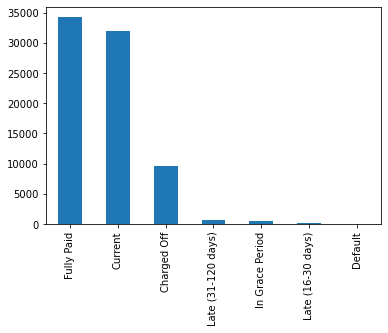

In [22]:
print(f"Print The Unique values in loan_status column:{Lending_Data.loan_status.unique()}")
# Target Variable
Lending_Data['loan_status'].value_counts(dropna=False).plot(kind='bar')

<Figure size 8000x3000 with 0 Axes>

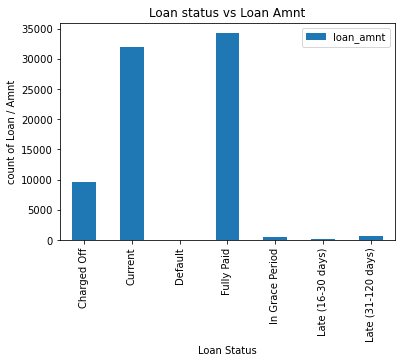

In [23]:
df_grade_status =Lending_Data.pivot_table(values='loan_amnt', index=['loan_status'],aggfunc='count')

plt.figure(num=None, figsize=(40, 15), dpi=200)

df_grade_status.plot(kind='bar')
plt.title("Loan status vs Loan Amnt")
plt.ylabel('count of Loan / Amnt')
plt.xlabel('Loan Status')

plt.show()

### As We Conclude From Above Graph, Loan with status ChargedOff,Current and Fully Paid Took the most nulber of loans.As Of Now We Only Work On The ChargedOff And FullyPaid Status.

In [24]:
# Only Filter Out The Current loan_status
Prediction_Data=Lending_Data[Lending_Data['loan_status']=='Current']
Lending_Data=Lending_Data[Lending_Data['loan_status']!='Current']

In [25]:
Lending_Data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

### Change Data To Charged Off As Bad Loan other than that we have good loan named as Fully Paid.

In [26]:
Lending_Data['loan_status']=Lending_Data['loan_status'].replace(['In Grace Period','Late (31-120 days)', 'Late (16-30 days)', 'Default'],'Charged Off')

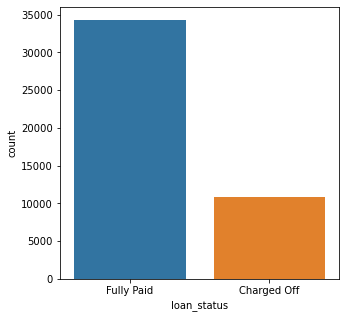

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x='loan_status', data=Lending_Data)
plt.show()

### As We Can See next_pymnt_d column value related to current loan_status.So We Are Dropping This Value As Well

In [28]:
Lending_Data=Lending_Data.drop(columns=['next_pymnt_d'])

### After Deletion Of The Column , Now We Check The Shape Of The Dataset Again

In [29]:
Lending_Data.shape

(45120, 85)

## In the above step , We see the from 108 column to 91 are remaining after removal of missing value. Now we use the describe function.

In [30]:
Lending_Data.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
count,45120.000000,45120.000000,4.512000e+04,45060.000000,45120.000000,42625.000000,42625.000000,45120.000000,45120.000000,45120.000000,...,45120.000000,45120.000000,45120.000000,45120.000000,45120.000000,45120.000000,45115.000000,44457.000000,45120.000000,45120.000000
mean,14783.789340,441.458004,7.704331e+04,19.430035,0.315426,1.056891,2.112704,0.543684,700.856605,704.856871,...,7.985395,13.092708,5.263608,11.390403,0.087589,2.070922,93.872433,37.866200,0.138364,0.037456
std,9551.190387,282.364449,8.972298e+04,21.503618,0.932207,1.503367,2.377264,0.829885,34.650897,34.652007,...,4.698091,7.816011,3.202403,5.686538,0.582133,1.825429,9.581373,36.153156,0.358512,0.373099
min,1000.000000,7.610000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,660.000000,664.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.900000,0.000000,0.000000,0.000000
25%,7200.000000,235.420000,4.500000e+04,11.790000,0.000000,0.000000,0.000000,0.000000,675.000000,679.000000,...,5.000000,7.000000,3.000000,7.000000,0.000000,1.000000,90.900000,0.000000,0.000000,0.000000
50%,12000.000000,366.720000,6.500000e+04,17.860000,0.000000,1.000000,1.000000,0.000000,695.000000,699.000000,...,7.000000,11.000000,5.000000,10.000000,0.000000,2.000000,100.000000,33.300000,0.000000,0.000000
75%,20000.000000,587.240000,9.100000e+04,24.700000,0.000000,2.000000,3.000000,1.000000,720.000000,724.000000,...,10.000000,17.000000,7.000000,14.000000,0.000000,3.000000,100.000000,66.700000,0.000000,0.000000
max,40000.000000,1717.630000,1.099920e+07,999.000000,36.000000,20.000000,35.000000,6.000000,845.000000,850.000000,...,63.000000,107.000000,36.000000,74.000000,36.000000,23.000000,100.000000,100.000000,6.000000,44.000000


## Lets Again Check The Amount Of Missing Values And Percentage In The Data

In [31]:
find_missing_value(Lending_Data).head(10)

,column_name,percent_missing
il_util,il_util,19.013741
mths_since_recent_inq,mths_since_recent_inq,10.376773
mths_since_rcnt_il,mths_since_rcnt_il,8.395390
all_util,all_util,5.554078
open_acc_6m,open_acc_6m,5.529699
open_rv_24m,open_rv_24m,5.529699
open_rv_12m,open_rv_12m,5.529699
total_bal_il,total_bal_il,5.529699
inq_last_12m,inq_last_12m,5.529699
open_act_il,open_act_il,5.529699


### Check Weather All The Values Of Rows Is Null

In [32]:
print('Lending Data',Lending_Data.isnull().all(axis=0).sum())
print('Lending Data Status Current',Prediction_Data.isnull().all(axis=0).sum())

Lending Data 0
Lending Data Status Current 0


### Now checking whether we have any row having more than NaN or Null value 

In [33]:
print("Lending Data",len(Lending_Data[Lending_Data.isnull().sum(axis=1)>14].index))
print("Lending Data With Current",len(Prediction_Data[Prediction_Data.isnull().sum(axis=1)>14].index))

Lending Data 416
Lending Data With Current 0


In [34]:
Lending_Data= Lending_Data.drop(Lending_Data[Lending_Data.isnull().sum(axis=1)>14].index)

## Lets Convert As Much As Columns Into Numeric Form

### we have column 'term' having all the values in the form of month.Now We Can parse the numeric value from the column and change the title as well. Using the lamda function to split the value and overwrite it in same dataset.

In [35]:
# Split The Value And Only Use The First Index Numric Value
Lending_Data['term']=Lending_Data['term'].astype(str).apply(lambda x:x.split(' ')[0])
# Rename The Column Name So We Can Relate The Value Easily
Lending_Data['term']=Lending_Data['term'].astype(float)
Lending_Data=Lending_Data.rename(columns={'term': 'term_in_month'})

##Split For Current Data
# Split The Value And Only Use The First Index Numric Value
Prediction_Data['term']=Prediction_Data['term'].astype(str).apply(lambda x:x.split(' ')[0])
# Rename The Column Name So We Can Relate The Value Easily
Prediction_Data['term']=Prediction_Data['term'].astype(float)
Prediction_Data=Prediction_Data.rename(columns={'term': 'term_in_month'})

### We Have Two Columns 'int_rate' And 'revol_util'.Both Column Can Also Converted Into Numaric Value By Removing The % Symbol.

In [36]:
#Now removing the % symbol from interest rate and revol_util columns
Lending_Data['int_rate']=Lending_Data['int_rate'].astype(str).apply(lambda x:x.split('%')[0])
Lending_Data['revol_util']=Lending_Data['revol_util'].astype(str).apply(lambda x:x.split('%')[0])
Lending_Data.head()

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term_in_month,installment,grade,earliest_cr_line,issue_d,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,Individual,RENT,Fully Paid,35000,15.05,36.0,1214.15,C,Jan-01,01-08-2017,...,5,6,5,7,0,1,80.0,0.0,0,0
1,Individual,RENT,Charged Off,21000,14.08,60.0,489.51,C,Dec-00,01-07-2017,...,10,11,5,13,0,1,100.0,33.3,1,0
3,Individual,RENT,Fully Paid,16000,19.03,36.0,586.74,D,Feb-90,01-08-2017,...,8,27,8,10,0,2,95.7,75.0,1,0
4,Individual,MORTGAGE,Fully Paid,24000,8.90,60.0,497.04,A,Mar-88,01-08-2013,...,7,11,4,12,0,1,100.0,0.0,0,0
5,Individual,MORTGAGE,Charged Off,35000,20.00,60.0,927.29,D,Nov-03,01-12-2017,...,5,7,1,11,0,6,100.0,0.0,0,0


In [37]:
## For Current Status Data
Prediction_Data['int_rate']=Prediction_Data['int_rate'].astype(str).apply(lambda x:x.split('%')[0])
Prediction_Data['revol_util']=Prediction_Data['revol_util'].astype(str).apply(lambda x:x.split('%')[0])
Prediction_Data.head()

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term_in_month,installment,grade,earliest_cr_line,issue_d,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
2,Individual,MORTGAGE,Current,20000,14.08,60.0,466.20,C,Apr-86,01-07-2017,...,12,17,7,14,0,2,100.0,18.2,0,0
8,Individual,RENT,Current,4800,10.42,36.0,155.84,B,May-10,01-09-2017,...,9,17,5,11,0,3,100.0,40.0,0,0
9,Individual,MORTGAGE,Current,32550,14.08,60.0,758.74,C,May-92,01-11-2017,...,13,17,9,16,0,3,100.0,28.6,0,0
12,Joint App,OWN,Current,24000,13.59,60.0,553.35,C,Mar-98,01-12-2017,...,13,13,9,16,0,1,100.0,0.0,1,0
14,Individual,MORTGAGE,Current,25000,15.05,60.0,595.41,C,Oct-10,01-08-2017,...,3,3,3,8,0,0,81.8,66.7,0,0


### Now Convert The Datatype Of The Above Column To Float ('int_rate', 'revol_util')

In [38]:
#now convert dtype for int_rate and revol_util to float
Lending_Data['int_rate']=Lending_Data['int_rate'].astype(float)
Lending_Data['revol_util']=Lending_Data['revol_util'].astype(float)

In [39]:
#now convert dtype for int_rate and revol_util to float
Prediction_Data['int_rate']=Prediction_Data['int_rate'].astype(float)
Prediction_Data['revol_util']=Prediction_Data['revol_util'].astype(float)

### Lets Work On The Date Variables. Change the datatype and format all the column into same sequence.

### Lets Check The Date Format Of The Columns

In [40]:
# First 3 Column Have Same Date Format And Last One Have Different.
print(f"earliest_cr_line {Lending_Data.earliest_cr_line.head(3)}{Lending_Data.earliest_cr_line.dtype}")
print(f"issue_d {Lending_Data.issue_d.head(3)}{Lending_Data.issue_d.dtype}")
print(f"last_pymnt_d {Lending_Data.last_pymnt_d.head(3)}{Lending_Data.last_pymnt_d.dtype}")

earliest_cr_line 0    Jan-01
1    Dec-00
3    Feb-90
Name: earliest_cr_line, dtype: objectobject
issue_d 0    01-08-2017
1    01-07-2017
3    01-08-2017
Name: issue_d, dtype: objectobject
last_pymnt_d 0    01-04-2020
1    01-06-2019
3    01-10-2019
Name: last_pymnt_d, dtype: objectobject


In [41]:
# First 4 Column Have Same Date Format And Last One Have Different.
print(f"earliest_cr_line {Prediction_Data.earliest_cr_line.head(3)}{Prediction_Data.earliest_cr_line.dtype}")
print(f"issue_d {Prediction_Data.issue_d.head(3)}{Prediction_Data.issue_d.dtype}")
print(f"last_pymnt_d {Prediction_Data.last_pymnt_d.head(3)}{Prediction_Data.last_pymnt_d.dtype}")
print(f"next_pymnt_d {Prediction_Data.next_pymnt_d.head(3)}{Prediction_Data.next_pymnt_d.dtype}")

earliest_cr_line 2    Apr-86
8    May-10
9    May-92
Name: earliest_cr_line, dtype: objectobject
issue_d 2    01-07-2017
8    01-09-2017
9    01-11-2017
Name: issue_d, dtype: objectobject
last_pymnt_d 2    01-05-2020
8    01-05-2020
9    01-05-2020
Name: last_pymnt_d, dtype: objectobject
next_pymnt_d 2    Jun-20
8    Jun-20
9    Jun-20
Name: next_pymnt_d, dtype: objectobject


In [42]:
Lending_Data['issue_d'] = pd.to_datetime(Lending_Data['issue_d'],format='%d-%m-%Y')
Lending_Data['earliest_cr_line'] = pd.to_datetime(Lending_Data['earliest_cr_line'],format='%b-%y')
Lending_Data['last_pymnt_d'] = pd.to_datetime(Lending_Data['last_pymnt_d'], format='%d-%m-%Y')

In [43]:
Prediction_Data['issue_d'] = pd.to_datetime(Prediction_Data['issue_d'],format='%d-%m-%Y')
Prediction_Data['earliest_cr_line'] = pd.to_datetime(Prediction_Data['earliest_cr_line'],format='%b-%y')
Prediction_Data['last_pymnt_d'] = pd.to_datetime(Prediction_Data['last_pymnt_d'], format='%d-%m-%Y')
Prediction_Data['next_pymnt_d'] = pd.to_datetime(Prediction_Data['next_pymnt_d'], format='%b-%y')

In [44]:
print(f"earliest_cr_line {Lending_Data.earliest_cr_line.head(1)}{Lending_Data.earliest_cr_line.dtype}")
print(f"issue_d {Lending_Data.issue_d.head(1)}{Lending_Data.issue_d.dtype}")
print(f"last_pymnt_d {Lending_Data.last_pymnt_d.head(1)}{Lending_Data.last_pymnt_d.dtype}")

earliest_cr_line 0   2001-01-01
Name: earliest_cr_line, dtype: datetime64[ns]datetime64[ns]
issue_d 0   2017-08-01
Name: issue_d, dtype: datetime64[ns]datetime64[ns]
last_pymnt_d 0   2020-04-01
Name: last_pymnt_d, dtype: datetime64[ns]datetime64[ns]


In [45]:
print(f"earliest_cr_line {Prediction_Data.earliest_cr_line.head(1)}{Prediction_Data.earliest_cr_line.dtype}")
print(f"issue_d {Prediction_Data.issue_d.head(1)}{Prediction_Data.issue_d.dtype}")
print(f"last_pymnt_d {Prediction_Data.last_pymnt_d.head(1)}{Prediction_Data.last_pymnt_d.dtype}")
print(f"next_pymnt_d {Prediction_Data.next_pymnt_d.head(1)}{Prediction_Data.next_pymnt_d.dtype}")

earliest_cr_line 2   1986-04-01
Name: earliest_cr_line, dtype: datetime64[ns]datetime64[ns]
issue_d 2   2017-07-01
Name: issue_d, dtype: datetime64[ns]datetime64[ns]
last_pymnt_d 2   2020-05-01
Name: last_pymnt_d, dtype: datetime64[ns]datetime64[ns]
next_pymnt_d 2   2020-06-01
Name: next_pymnt_d, dtype: datetime64[ns]datetime64[ns]


In [46]:
#Lets Rename The Column Name For Better Understanding
Lending_Data=Lending_Data.rename(columns={'issue_d':'issue_date','last_pymnt_d':'last_pymnt_date'})                            
Lending_Data.head(2)

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term_in_month,installment,grade,earliest_cr_line,issue_date,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,Individual,RENT,Fully Paid,35000,15.05,36.0,1214.15,C,2001-01-01,2017-08-01,...,5,6,5,7,0,1,80.0,0.0,0,0
1,Individual,RENT,Charged Off,21000,14.08,60.0,489.51,C,2000-12-01,2017-07-01,...,10,11,5,13,0,1,100.0,33.3,1,0


In [47]:
#Lets Rename The Column Name For Better Understanding
Prediction_Data=Prediction_Data.rename(columns={'issue_d':'issue_date','last_pymnt_d':'last_pymnt_date','next_pymnt_d':'next_pymnt_date'})                             
Prediction_Data.head(2)

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term_in_month,installment,grade,earliest_cr_line,issue_date,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
2,Individual,MORTGAGE,Current,20000,14.08,60.0,466.20,C,1986-04-01,2017-07-01,...,12,17,7,14,0,2,100.0,18.2,0,0
8,Individual,RENT,Current,4800,10.42,36.0,155.84,B,2010-05-01,2017-09-01,...,9,17,5,11,0,3,100.0,40.0,0,0


### Lets Seprate The Date Columns And Create New                 

In [48]:
Lending_Data['earliest_cr_line_year']=Lending_Data['earliest_cr_line'].dt.year
Lending_Data['earliest_cr_line_month']=Lending_Data['earliest_cr_line'].dt.month
Lending_Data['issue_date_year']=Lending_Data['issue_date'].dt.year
Lending_Data['issue_date_month']=Lending_Data['issue_date'].dt.month

In [49]:
Prediction_Data['earliest_cr_line_year']=Prediction_Data['earliest_cr_line'].dt.year
Prediction_Data['earliest_cr_line_month']=Prediction_Data['earliest_cr_line'].dt.month
Prediction_Data['issue_date_year']=Prediction_Data['issue_date'].dt.year
Prediction_Data['issue_date_month']=Prediction_Data['issue_date'].dt.month
Prediction_Data['next_pymnt_date_year']=Prediction_Data['next_pymnt_date'].dt.year
Prediction_Data['next_pymnt_date_month']=Prediction_Data['next_pymnt_date'].dt.month

### Using The Below Command We have found in earliest_cr_line_year columns have multiple entries which have year greater than 2021.So we refer back to the old file and found these dates
### have 100 years of difference.

In [50]:
len(Lending_Data[Lending_Data['earliest_cr_line_year'] > 2021 ])

78

In [51]:
#Now correcting the Year for the above 79 values
Lending_Data.loc[Lending_Data['earliest_cr_line_year'] > 2021 , 'earliest_cr_line_year'] = Lending_Data['earliest_cr_line_year'] - 100

### We Are Checking This For Issue Date Year Column As Well and the output is zero

In [52]:
len(Lending_Data[Lending_Data['issue_date_year'] > 2021 ])

0

### Doing For Current Dataset

In [53]:
len(Prediction_Data[Prediction_Data['earliest_cr_line_year'] > 2021 ])

68

In [54]:
#Now correcting the Year for the above 79 values
Prediction_Data.loc[Prediction_Data['earliest_cr_line_year'] > 2021 , 'earliest_cr_line_year'] = Prediction_Data['earliest_cr_line_year'] - 100

In [55]:
len(Prediction_Data[Prediction_Data['issue_date_year'] > 2021 ])

0

In [56]:
len(Prediction_Data[Prediction_Data['next_pymnt_date_year'] > 2021 ])

0

### Lets Check The Unique Value For Our Target Variable ###

In [57]:
Lending_Data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

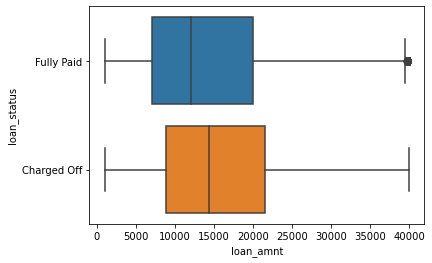

In [58]:
sns.boxplot(x='loan_amnt',y='loan_status',data=Lending_Data)

In [59]:
find_missing_value(Lending_Data).head(20)

,column_name,percent_missing
il_util,il_util,18.260111
mths_since_recent_inq,mths_since_recent_inq,9.676986
mths_since_rcnt_il,mths_since_rcnt_il,7.542949
all_util,all_util,4.675197
total_cu_tl,total_cu_tl,4.650591
open_acc_6m,open_acc_6m,4.650591
max_bal_bc,max_bal_bc,4.650591
open_rv_24m,open_rv_24m,4.650591
open_rv_12m,open_rv_12m,4.650591
open_act_il,open_act_il,4.650591


In [60]:
find_missing_value(Prediction_Data).head(10)

,column_name,percent_missing
il_util,il_util,14.616561
mths_since_recent_inq,mths_since_recent_inq,14.235775
mths_since_rcnt_il,mths_since_rcnt_il,3.405225
mo_sin_old_il_acct,mo_sin_old_il_acct,3.405225
hardship_flag,hardship_flag,2.459502
bc_util,bc_util,1.463841
percent_bc_gt_75,percent_bc_gt_75,1.423265
bc_open_to_buy,bc_open_to_buy,1.420144
mths_since_recent_bc,mths_since_recent_bc,1.348357
dti,dti,0.149817


### After All The Conversion And Parsing Of Date Remove The Duplicate Columns

In [61]:
Lending_Data = Lending_Data.drop(columns=['earliest_cr_line', 'issue_date', 'last_pymnt_date'])

In [62]:
Prediction_Data = Prediction_Data.drop(columns=['earliest_cr_line', 'issue_date', 'last_pymnt_date','next_pymnt_date'])

### Now We Are Imputing All The Remaining Columns, Using TransformerMixin ###

In [63]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        # Find most common value with value_counts() which returns 
        # counts in descending order so that the first element is the most frequently-occurring element.
        self.fill = pd.Series([X[c].value_counts().index[0]
            #Use that if type is object otherwise use mean                   
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


In [64]:
#Calling The Impute Fuction To Fill Null Values
Lending_Data = DataFrameImputer().fit_transform(Lending_Data)
find_missing_value(Lending_Data).head()

,column_name,percent_missing
application_type,application_type,0.0
bc_util,bc_util,0.0
recoveries,recoveries,0.0
bc_open_to_buy,bc_open_to_buy,0.0
avg_cur_bal,avg_cur_bal,0.0


In [65]:
#Calling The Impute Fuction To Fill Null Values
Prediction_Data = DataFrameImputer().fit_transform(Prediction_Data)
find_missing_value(Prediction_Data).head()

,column_name,percent_missing
application_type,application_type,0.0
home_ownership,home_ownership,0.0
collection_recovery_fee,collection_recovery_fee,0.0
chargeoff_within_12_mths,chargeoff_within_12_mths,0.0
recoveries,recoveries,0.0


In [66]:
print(f"Find The Count Of The Cateogorical Colmun {len(Lending_Data.select_dtypes(exclude=np.number).columns)} \n")

print(Lending_Data.select_dtypes(exclude=np.number).columns.tolist)

Find The Count Of The Cateogorical Colmun 7 

<bound method IndexOpsMixin.tolist of Index(['application_type', 'home_ownership', 'loan_status', 'grade',
       'verification_status', 'purpose', 'hardship_flag'],
      dtype='object')>


In [67]:
print(f"Find The Count Of The Cateogorical Colmun {len(Prediction_Data.select_dtypes(exclude=np.number).columns)} \n")

print(Prediction_Data.select_dtypes(exclude=np.number).columns.tolist)

Find The Count Of The Cateogorical Colmun 7 

<bound method IndexOpsMixin.tolist of Index(['application_type', 'home_ownership', 'loan_status', 'grade',
       'verification_status', 'purpose', 'hardship_flag'],
      dtype='object')>


### Lets Encode The Categorical Columns After Converting The Some Important Columns Manually.

In [68]:
from sklearn import preprocessing
import category_encoders as ce

def encode_category_data(dataset_var):
       #We establish the Ordinal encoder which will convert each categorical label to a number
       # We specify the columns we want to transform, we ask it to handle missing values if any and also to return a dataframe                     instead of an np array
       encode_var = ce.OrdinalEncoder(cols=['application_type', 'home_ownership', 'loan_status', 'grade',
       'verification_status', 'purpose', 'hardship_flag'],handle_missing='return_nan',return_df= True)
       dataset_var=encode_var.fit_transform(dataset_var)
       return dataset_var

In [69]:
#We now fit the model and transform the data and put it in X which is a dataframe
Lending_Data=encode_category_data(Lending_Data)

C:\Users\Patrick-Pc\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [70]:
#We now fit the model and transform the data and put it in X which is a dataframe
Prediction_Data=encode_category_data(Prediction_Data)

C:\Users\Patrick-Pc\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [71]:
Lending_Data.groupby('loan_status').count()

,application_type,home_ownership,loan_amnt,int_rate,term_in_month,installment,grade,annual_inc,verification_status,purpose,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,earliest_cr_line_year,earliest_cr_line_month,issue_date_year,issue_date_month
loan_status,,,,,,,,,,,,,,,,,,,,,
1.0,33889,33889,33889,33889,33889,33889,33889,33889,33889,33889,...,33889,33889,33889,33889,33889,33889,33889,33889,33889,33889
2.0,10815,10815,10815,10815,10815,10815,10815,10815,10815,10815,...,10815,10815,10815,10815,10815,10815,10815,10815,10815,10815


### For Outlier Detection Lets Check Some Columns Manually By Ploting Box Whisker Plot.

<AxesSubplot:xlabel='loan_amnt'>

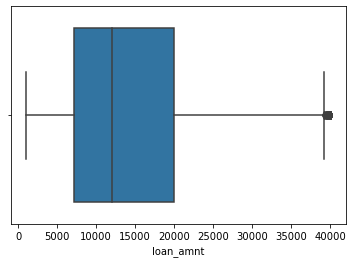

In [72]:
sns.boxplot(x=Lending_Data['loan_amnt'],data=Lending_Data)

<AxesSubplot:xlabel='int_rate'>

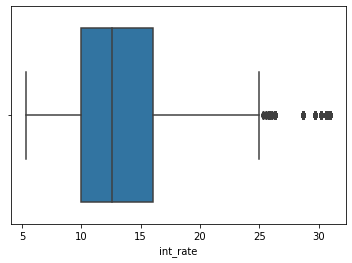

In [73]:
sns.boxplot(x=Lending_Data['int_rate'],data=Lending_Data)

<AxesSubplot:xlabel='total_pymnt'>

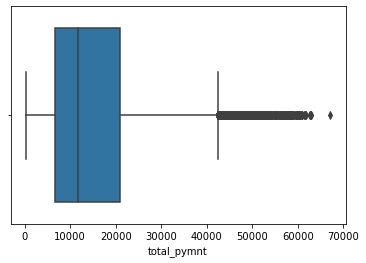

In [74]:
sns.boxplot(x=Lending_Data['total_pymnt'],data=Lending_Data)

#### Compare Them Together As Well For Outlier Identification

<Figure size 720x432 with 0 Axes>

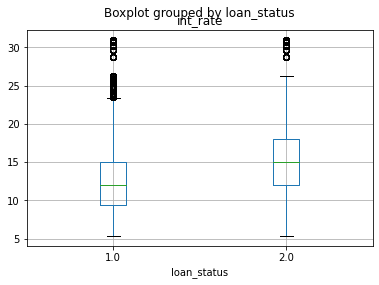

In [75]:
plt.figure(figsize=[10, 6])
Lending_Data.boxplot(column='int_rate', by='loan_status')
plt.show()

<Figure size 720x432 with 0 Axes>

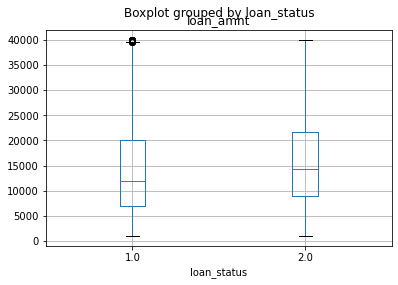

In [76]:
plt.figure(figsize=[10, 6])
Lending_Data.boxplot(column='loan_amnt', by='loan_status')
plt.show()

<Figure size 720x432 with 0 Axes>

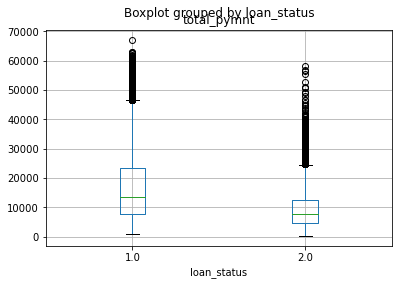

In [77]:
plt.figure(figsize=[10, 6])
Lending_Data.boxplot(column='total_pymnt', by='loan_status')
plt.show()

In [78]:
cor_matrix = Lending_Data.corr().abs()

In [79]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['installment', 'fico_range_high', 'last_fico_range_low', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_util', 'open_rv_24m', 'avg_cur_bal', 'bc_open_to_buy', 'collection_recovery_fee', 'num_actv_rev_tl', 'num_bc_sats', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'earliest_cr_line_year']


<AxesSubplot:>

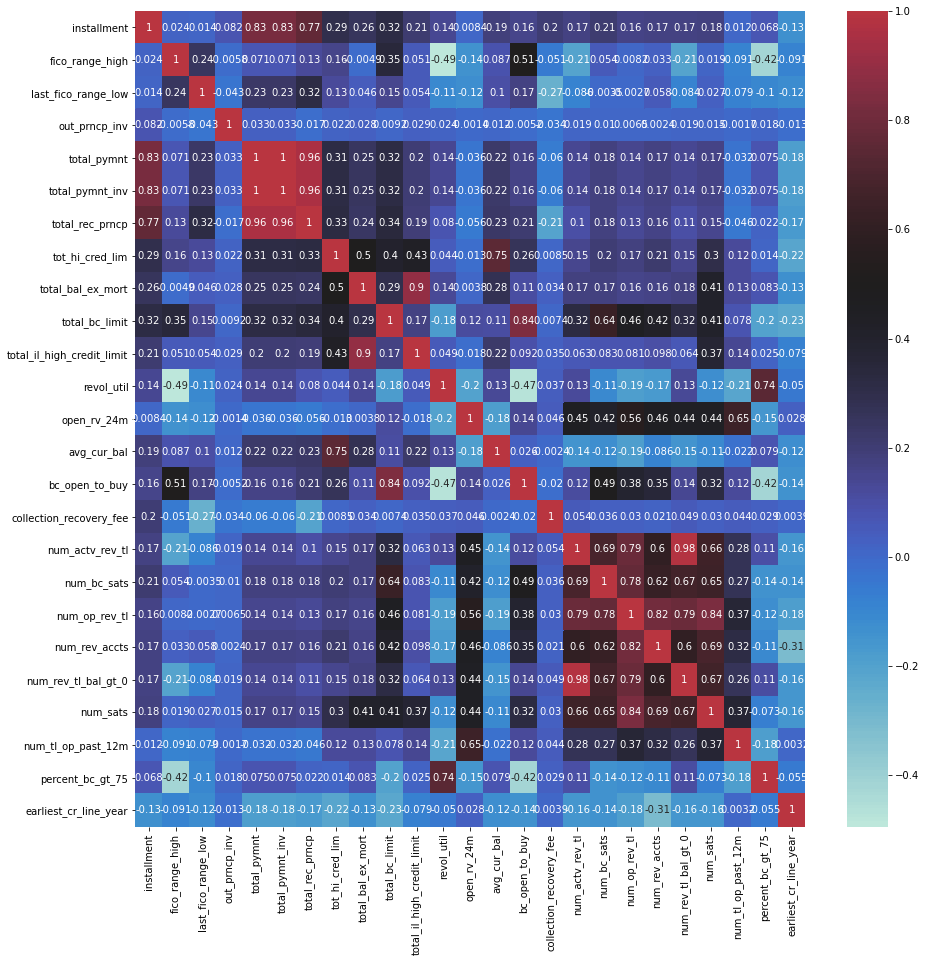

In [80]:
plt.figure(figsize=(15,15))
corr = Lending_Data[to_drop].corr()
sns.heatmap(corr, annot=True, center=0.5)

In [81]:
#Drop The Highly Correlated Columns Selected From Above List
list_to_drop=['installment', 'fico_range_high', 'last_fico_range_low', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_util', 'open_rv_24m', 'avg_cur_bal', 'bc_open_to_buy', 'collection_recovery_fee', 'num_actv_rev_tl', 'num_bc_sats', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75']
Lending_Data = Lending_Data.drop(list_to_drop, axis=1)

In [82]:
cor_matrix_current=Prediction_Data.corr().abs()

In [83]:
upper_tri_current = cor_matrix_current.where(np.triu(np.ones(cor_matrix_current.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri_current.columns if any(upper_tri_current[column] > 0.80)]
print(to_drop)

['installment', 'fico_range_high', 'last_fico_range_low', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_util', 'open_rv_24m', 'avg_cur_bal', 'bc_open_to_buy', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'earliest_cr_line_year', 'next_pymnt_date_month']


In [84]:
#Drop The Highly Correlated Columns Selected From Above List
list_to_drop=['installment', 'fico_range_high', 'last_fico_range_low', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_util', 'open_rv_24m', 'avg_cur_bal', 'bc_open_to_buy', 'collection_recovery_fee', 'num_actv_rev_tl', 'num_bc_sats', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75']
Prediction_Data = Prediction_Data.drop(list_to_drop, axis=1)

### Applying Isolation Forest Algorithm To Detect Outliers.Then Mask The Outliers

In [85]:
#import the implementation of this algorihm from sklearn
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
def find_mask_outlier(dataset):
    clf = IsolationForest(max_samples=150, random_state = 1, contamination= 'auto')
    preds = clf.fit_predict(dataset)
    print(preds)
    totalOutliers=0
    for pred in preds:
        if pred == -1:
            totalOutliers=totalOutliers+1
    print("Total number of outliers identified is: ",totalOutliers)

    del clf
    # select all rows that are not outliers and create a boolean mask
    mask = preds != -1
    # Apply mask to y and check shape
    dataset= dataset[mask]
    return dataset

In [86]:
Lending_Data = find_mask_outlier(Lending_Data)

[1 1 1 ... 1 1 1]
Total number of outliers identified is:  2401


In [87]:
Prediction_Data=find_mask_outlier(Prediction_Data)

[1 1 1 ... 1 1 1]
Total number of outliers identified is:  2136


In [88]:
Lending_Data.shape

(42303, 63)

### Split The Data Set into x and y

In [89]:
y=Lending_Data.loan_status
x=Lending_Data.iloc[:,Lending_Data.columns !='loan_status']

print(y.shape)
print(x.shape)
del Lending_Data

(42303,)
(42303, 62)


In [90]:
y_current=Prediction_Data.loan_status
x_current=Prediction_Data.iloc[:,Prediction_Data.columns !='loan_status']

### Feature Selection Algorithm 

In [91]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif ,chi2

def find_best_features(data_set,count):
    # configure to select all features
    bestfeatures = SelectKBest(chi2, k=count)
    X1=bestfeatures.fit(x,y)
    #Retrieve the column names for the selected columns
    chi2_name = x.columns.values[bestfeatures.get_support()]
    # configure to select all features
    bestfeatures = SelectKBest(mutual_info_classif, k=count)
    X1=bestfeatures.fit(x,y)
    #Retrieve the column names for the selected columns
    mutual_names = x.columns.values[bestfeatures.get_support()]
    tmpList=chi2_name.tolist()
    tmpList2=mutual_names.tolist()
    tmpList=tmpList+tmpList2
    tmp_set=set(tmpList)
    return tmp_set

In [92]:
filter_column=find_best_features(x,20)

In [93]:
x=x[list(filter_column)]
x.shape

(42303, 32)

### Preform Same On Current Data

In [94]:
filter_column_current=find_best_features(x_current,20)
x_current=x_current[list(filter_column_current)]

### Test And Train Split

### Cross Validation On The Test Data And Training. Split The Data Using Kfold

In [107]:
from sklearn.model_selection import StratifiedKFold
variables = StratifiedKFold(n_splits=4)

for train,test in variables.split(x,y):
    x_train,x_test=x.iloc[train],x.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    

In [108]:
print(f"x_train shape :{x_train.shape} | x_test shape :{x_test.shape} | y_train shape :{y_train.shape} | y_test shape :{y_test.shape}")

print(f"y value_count :{y.value_counts()} | y_train value_count :{y_train.value_counts()} | y_test value_count :{y_test.value_counts()}")


x_train shape :(31728, 32) | x_test shape :(10575, 32) | y_train shape :(31728,) | y_test shape :(10575,)
y value_count :1.0    32775
2.0     9528
Name: loan_status, dtype: int64 | y_train value_count :1.0    24582
2.0     7146
Name: loan_status, dtype: int64 | y_test value_count :1.0    8193
2.0    2382
Name: loan_status, dtype: int64


In [109]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler,QuantileTransformer,MinMaxScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

### Function To Test And Predict Every Standalone Model With Some Initial Input related To Class imbalance (Smote,RandomSample) , Normalization(Normalization) , Scaler Method (StandardScaler),PCA Method,Models.
#### Output Will Show The Accuracy Score , Confusion Matrix , Balanced Accuracy , Classification Report

In [110]:
def check_standalone_prediction(smote_flag,random_sample_flag,norm_flag,scale_flag,pca_flag,x_train,y_train,x_test,y_test,model_var,modelName):
    if smote_flag == True:
        sm=SMOTE(random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
        print(f"Smote y_train value_count :{y_train.value_counts()}")
    if random_sample_flag == True:
        rs=RandomOverSampler(0.75)
        x_train, y_train = rs.fit_resample(x_train, y_train)
        print(f"RandomOverSampler y_train value_count :{y_train.value_counts()}")
    if norm_flag == True:
        normalizer = Normalizer(norm='l2')
        x_train = normalizer.fit_transform(x_train)
        x_test = normalizer.fit_transform(x_test)
    if scale_flag == True:
        scaler = StandardScaler()
        x_train=scaler.fit_transform(x_train)
        x_test=scaler.transform(x_test)
    if pca_flag == True:
        pca=PCA(n_components=2)
        x_train = pca.fit_transform(x_train)
        x_test = pca.fit_transform(x_test)
    
    model_class = model_var.fit(x_train,y_train)
    y_hat=model_class.predict(x_test)       

    print(f"Accuracy Score {modelName}: {accuracy_score(y_test,y_hat)}")
    print(f"Confusion Matrix  {modelName}: {confusion_matrix(y_test,y_hat)}")
    print(f"Balanced Accuracy {modelName}: {balanced_accuracy_score(y_test,y_hat)}") 
    print(f"Classification_Report {modelName}: {classification_report(y_test,y_hat)}") 
        
    
    print(f"------------------------------------------------------") 
    plot_confusion_matrix(model_var,x_test,y_test)
    #plot_precision_recall_curve(model_class, x_test, y_test)
    #plot_roc_curve(model_class, x_test, y_test) 

### Decision Tree Prediction


Smote y_train value_count :2.0    24582
1.0    24582
Name: loan_status, dtype: int64
Accuracy Score Decision Tree: 0.9891252955082742
Confusion Matrix  Decision Tree: [[8130   63]
 [  52 2330]]
Balanced Accuracy Decision Tree: 0.9852400571723543
Classification_Report Decision Tree:               precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      8193
         2.0       0.97      0.98      0.98      2382

    accuracy                           0.99     10575
   macro avg       0.98      0.99      0.98     10575
weighted avg       0.99      0.99      0.99     10575

------------------------------------------------------


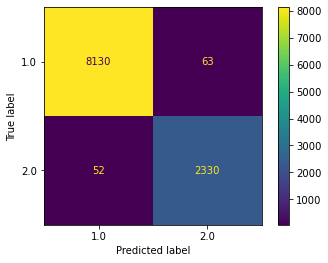

In [111]:
smote_flag=True
random_s_flag=False
norm_flag=False
scale_flag=True
pca_flag=False
decision_tree=tree.DecisionTreeClassifier()
check_standalone_prediction(smote_flag,random_s_flag,norm_flag,scale_flag,pca_flag,x_train.copy(deep=False),y_train.copy(deep=False),x_test.copy(deep=False),y_test.copy(deep=False),decision_tree,"Decision Tree")

### Random Forest Prediction

Smote y_train value_count :2.0    24582
1.0    24582
Name: loan_status, dtype: int64
Accuracy Score Random Forest Tree: 0.984113475177305
Confusion Matrix  Random Forest Tree: [[8123   70]
 [  98 2284]]
Balanced Accuracy Random Forest Tree: 0.9751571117569493
Classification_Report Random Forest Tree:               precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      8193
         2.0       0.97      0.96      0.96      2382

    accuracy                           0.98     10575
   macro avg       0.98      0.98      0.98     10575
weighted avg       0.98      0.98      0.98     10575

------------------------------------------------------


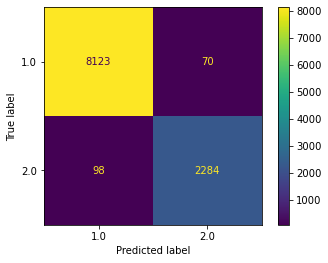

In [112]:
smote_flag=True
random_s_flag=False
norm_flag=False
scale_flag=True
pca_flag=False
random_state_class=RandomForestClassifier()
check_standalone_prediction(smote_flag,random_s_flag,norm_flag,scale_flag,pca_flag,x_train.copy(deep=False),y_train.copy(deep=False),x_test.copy(deep=False),y_test.copy(deep=False),random_state_class,"Random Forest Tree")

### SVM Model Prediction

Smote y_train value_count :2.0    24582
1.0    24582
Name: loan_status, dtype: int64
Accuracy Score SVM Model Tree: 0.9629314420803783
Confusion Matrix  SVM Model Tree: [[8184    9]
 [ 383 1999]]
Balanced Accuracy SVM Model Tree: 0.9190561242763913
Classification_Report SVM Model Tree:               precision    recall  f1-score   support

         1.0       0.96      1.00      0.98      8193
         2.0       1.00      0.84      0.91      2382

    accuracy                           0.96     10575
   macro avg       0.98      0.92      0.94     10575
weighted avg       0.96      0.96      0.96     10575

------------------------------------------------------


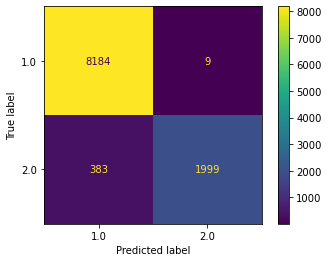

In [118]:
smote_flag=True
random_s_flag=False
norm_flag=False
scale_flag=True
pca_flag=False
svm_class=svm.SVC()
check_standalone_prediction(smote_flag,random_s_flag,norm_flag,scale_flag,pca_flag,x_train.copy(deep=False),y_train.copy(deep=False),x_test.copy(deep=False),y_test.copy(deep=False),svm_class,"SVM Model Tree")

# Hyper Parameter Tuning Using GridSearchCV Method

### Apply The Hyper Parameter Tuning Using Both Method GridSearch Search

In [114]:
def hyper_parameter(pipe,param,x_train,y_train,x_test,y_test,model_name):
    rsv=GridSearchCV(pipe,params,cv=10,n_jobs=6)
    rsv.fit(x_train, y_train)
    score = rsv.score(x_test, y_test)
    y_hat=rsv.predict(x_test)
    print("Score:",score)
    print("Best Param",rsv.best_params_)
    print("Best estimator",rsv.best_estimator_)
    print(f"Accuracy Score {model_name}: {accuracy_score(y_test,y_hat)}")
    print(f"Confusion Matrix  {model_name}: {confusion_matrix(y_test,y_hat)}")
    print(f"Balanced Accuracy {model_name}: {balanced_accuracy_score(y_test,y_hat)}") 
    print(f"Classification_Report {model_name}: {classification_report(y_test,y_hat)}") 

    print(f"------------------------------------------------------") 
    plot_confusion_matrix(rsv,x_test,y_test)

In [115]:
def hyper_parameter_random(pipe,param,x_train,y_train,x_test,y_test,model_name):
    rsv=RandomizedSearchCV(pipe,params,cv=10,n_jobs=6)
    rsv.fit(x_train, y_train)
    score = rsv.score(x_test, y_test)
    y_hat=rsv.predict(x_test)
    print("Score:",score)
    print("Best Param",rsv.best_params_)
    print("Best estimator",rsv.best_estimator_)
    print(f"Accuracy Score {model_name}: {accuracy_score(y_test,y_hat)}")
    print(f"Confusion Matrix  {model_name}: {confusion_matrix(y_test,y_hat)}")
    print(f"Balanced Accuracy {model_name}: {balanced_accuracy_score(y_test,y_hat)}") 
    print(f"Classification_Report {model_name}: {classification_report(y_test,y_hat)}") 

    print(f"------------------------------------------------------") 
    plot_confusion_matrix(rsv,x_test,y_test)

### Tuning For Decision Tree

Score: 0.9929078014184397
Best Param {'clf__criterion': 'entropy', 'clf__max_depth': None}
Best estimator Pipeline(steps=[('transformer', StandardScaler()),
                ('clf', DecisionTreeClassifier(criterion='entropy'))])
Accuracy Score Decision Tree: 0.9929078014184397
Confusion Matrix  Decision Tree: [[8159   34]
 [  41 2341]]
Balanced Accuracy Decision Tree: 0.9893188447101584
Classification_Report Decision Tree:               precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      8193
         2.0       0.99      0.98      0.98      2382

    accuracy                           0.99     10575
   macro avg       0.99      0.99      0.99     10575
weighted avg       0.99      0.99      0.99     10575

------------------------------------------------------


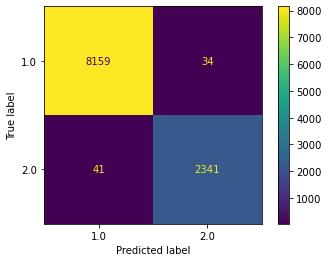

In [116]:
## Create Copy Of The Test Data
x_train_copy=x_train.copy(deep=False)
y_train_copy=y_train.copy(deep=False)
x_test_copy=x_test.copy(deep=False)
y_test_copy=y_test.copy(deep=False)
## Apply Smote On The Data
sm=SMOTE(random_state=42)
x_train_copy, y_train_copy = sm.fit_resample(x_train_copy, y_train_copy)
#x_test_copy, y_test_copy = sm.fit_resample(x_test_copy, y_test_copy)


params = {"clf__criterion": ['gini', 'entropy'],"clf__max_depth":[1,2,3,4,5,6,7,None]}

pipe = Pipeline(steps=[('transformer',StandardScaler()),("clf", tree.DecisionTreeClassifier())])
#pca 86
#without pca 99
hyper_parameter(pipe,params,x_train_copy,y_train_copy,x_test_copy,y_test_copy,"Decision Tree")
del x_train_copy
del y_train_copy
del x_test_copy
del y_test_copy

del params
del pipe

### Tuning Random Forest

Score: 0.9925295508274231
Best Param {'clf__n_estimators': 50, 'clf__max_features': 10, 'clf__max_depth': 50, 'clf__criterion': 'entropy', 'clf__bootstrap': False}
Best estimator Pipeline(steps=[('transformer', StandardScaler()),
                ('clf',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        max_depth=50, max_features=10,
                                        n_estimators=50))])
Accuracy Score Random Forest: 0.9925295508274231
Confusion Matrix  Random Forest: [[8177   16]
 [  63 2319]]
Balanced Accuracy Random Forest: 0.9857993753345379
Classification_Report Random Forest:               precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      8193
         2.0       0.99      0.97      0.98      2382

    accuracy                           0.99     10575
   macro avg       0.99      0.99      0.99     10575
weighted avg       0.99      0.99      0.99     10575

------------

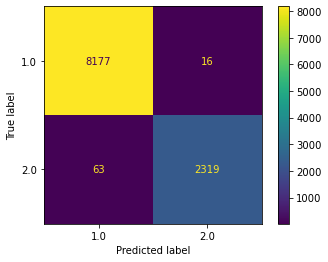

In [117]:
## Create Copy Of The Test Data
x_train_copy=x_train.copy(deep=False)
y_train_copy=y_train.copy(deep=False)
x_test_copy=x_test.copy(deep=False)
y_test_copy=y_test.copy(deep=False)
## Apply Smote On The Data
sm=SMOTE(random_state=42)
x_train_copy, y_train_copy = sm.fit_resample(x_train_copy, y_train_copy)
#x_test_copy, y_test_copy = sm.fit_resample(x_test_copy, y_test_copy)

params = {"clf__n_estimators": [10,30,50,100],"clf__max_depth": [10,50,None],"clf__max_features": [5, 10],"clf__bootstrap":[True,False],"clf__criterion":['gini','entropy']}
               
pipe = Pipeline(steps=[("transformer", StandardScaler()),("clf", RandomForestClassifier())])

hyper_parameter_random(pipe,params,x_train_copy,y_train_copy,x_test_copy,y_test_copy,"Random Forest")
del x_train_copy
del y_train_copy
del x_test_copy
del y_test_copy

del params
del pipe